In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

# For Numerical Data

In [2]:
df = pd.read_csv('Titanic-Dataset.csv', usecols=['Age','Fare','Survived'])

In [3]:
df.head() 

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [4]:
# for checking %age of missing values 

df.isnull().mean()*100

Survived     0.00000
Age         19.86532
Fare         0.00000
dtype: float64

In [5]:
# call train test split method

X_train,X_test,y_train,y_test = train_test_split(df.drop(columns=['Survived']) ,df['Survived'], test_size=0.2, random_state=2) 

In [6]:
X_train.head()

,Age,Fare
30,40.0,27.7208
10,4.0,16.7000
873,47.0,9.0000
182,9.0,31.3875
876,20.0,9.8458


In [7]:
# Now, we put the value of the x_train and x_test in another variable for the future

X_train['Age_imputed'] = X_train['Age']
X_test['Age_imputed'] = X_test['Age']

In [8]:
X_train.tail()

,Age,Fare,Age_imputed
534,30.0,8.6625,30.0
584,NaN,8.7125,NaN
493,71.0,49.5042,71.0
527,NaN,221.7792,NaN
168,NaN,25.9250,NaN


In [9]:
# X_train['Age_imputed'][X_train['Age_imputed'].isnull()]  --> it gives the no. of all "NAN" values present in 'Age_imputed' (i.e., 148) 

# Now, after that we have to put te values inside it

# X_train['Age'].dropna().sample(1).values --> after applying sample to it, it extracts any one random value from the sample(i.e, any random no.)

# but, we don't need only one value because there is 148 "NAN" values, so we want 148 values for that   
# so, for getting 148 values write the code for this -

X_train['Age_imputed'][X_train['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values

X_test['Age_imputed'][X_test['Age_imputed'].isnull()] = X_test['Age'].dropna().sample(X_test['Age'].isnull().sum()).values

C:\Users\munna\AppData\Local\Temp\ipykernel_6756\645259050.py:10: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  X_train['Age_imputed'][X_train['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values
C:

In [10]:
# So,these are our randomly generated values from the sample

X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values

array([24.  , 29.  , 54.  , 19.  , 51.  , 31.  , 24.  ,  8.  ,  9.  ,
       71.  , 30.  , 38.  , 27.  , 61.  , 21.  , 27.  , 37.  , 24.  ,
       36.  , 38.  ,  3.  , 32.  , 31.  , 24.  , 18.  , 19.  , 42.  ,
       43.  ,  0.67, 37.  ,  9.  , 25.  ,  9.  ,  6.  , 42.  , 30.  ,
       28.  , 27.  , 31.  , 24.  , 38.  , 26.  , 18.  , 30.  , 17.  ,
       16.  , 45.  , 20.  ,  3.  , 23.  , 49.  , 34.  , 42.  , 20.  ,
       30.  , 28.  , 26.  , 45.  , 47.  , 71.  ,  4.  , 24.  , 22.  ,
       31.  , 14.  , 39.  , 21.  , 44.  , 20.  , 39.  , 16.  , 25.  ,
       26.  , 16.  ,  9.  , 45.  , 31.  , 25.  ,  7.  , 50.  , 34.  ,
       33.  , 34.  ,  4.  , 40.  , 23.  , 16.  , 36.  , 32.5 , 25.  ,
       25.  , 56.  , 21.  , 35.  , 25.  , 48.  , 26.  , 57.  , 28.  ,
        4.  ,  4.  , 53.  , 17.  , 42.  , 60.  , 56.  , 24.  , 30.  ,
       25.  , 18.  , 33.  , 32.  , 16.  , 22.  , 18.  , 30.  , 33.  ,
       18.  , 30.  , 48.  , 54.  , 26.  , 31.  , 25.  , 34.  , 45.  ,
       22.  , 21.  ,

In [11]:
X_test['Age'].dropna().sample(X_test['Age'].isnull().sum()).values

array([39. , 31. , 30. , 22. , 64. , 41. , 32. , 20. ,  1. , 27. , 44. ,
       25. , 21. , 44. , 34. , 18. , 17. ,  2. , 16. , 36. , 44. , 24. ,
       25. , 40. , 17. , 23. , 55. , 65. , 30.5])

In [12]:
# Now, in 'Age_imputed' column, all missing values are imputed by the random numbers from the sample

X_train

,Age,Fare,Age_imputed
30,40.0,27.7208,40.0
10,4.0,16.7000,4.0
873,47.0,9.0000,47.0
182,9.0,31.3875,9.0
876,20.0,9.8458,20.0
...,...,...,...
534,30.0,8.6625,30.0
584,NaN,8.7125,21.0
493,71.0,49.5042,71.0
527,NaN,221.7792,34.0


C:\Users\munna\AppData\Local\Temp\ipykernel_6756\3078046068.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Age'], label='Original', hist=False)
C:\Users\munna\AppData\Local\Temp\ipykernel_6756\3078046068.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[

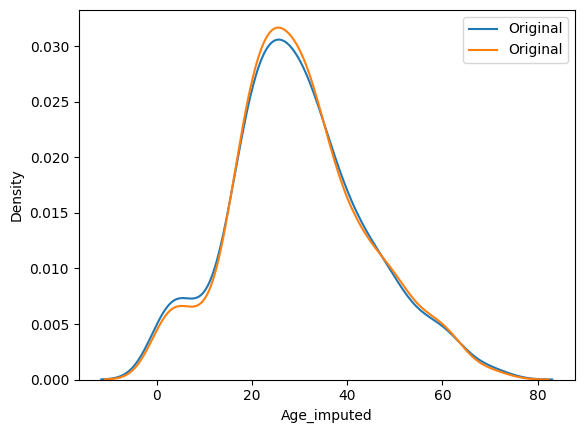

In [13]:
# Now, compare both 'Age' and 'Age_imputed' by plotting graph

sns.distplot(X_train['Age'], label='Original', hist=False) 
sns.distplot(X_train['Age_imputed'], label='Original', hist=False)

plt.legend()
plt.show()

In [14]:
#find variance

print("Original variable variance:", X_train['Age'].var())
print("Variance after random imputation:", X_train['Age_imputed'].var())

# here, difference is very small, so, there is no need to consider it

Original variable variance: 204.34951339046142
Variance after random imputation: 197.40903310083124


In [15]:
# but, covariance change in this

X_train[['Fare','Age','Age_imputed']].cov()                  

# so here, we can see there is very big difference in covariance of 'Age' and 'Age_imputed' for "Fare" ro

,Fare,Age,Age_imputed
Fare,2368.246832,71.512440,51.400182
Age,71.512440,204.349513,204.349513
Age_imputed,51.400182,204.349513,197.409033


<Axes: >

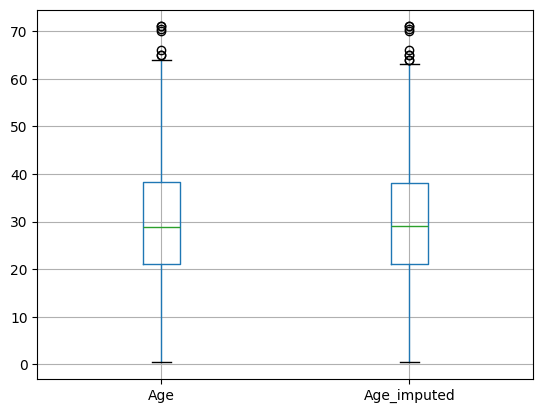

In [16]:
# there is no effect can be seen on outliers

X_train[['Age','Age_imputed']].boxplot()

# For Categorical Data

In [17]:
data = pd.read_csv('housing_dataset.csv', usecols=['GarageQual', 'FireplaceQu', 'SalePrice'])

In [18]:
data.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [19]:
df.isnull().mean()*100

Survived     0.00000
Age         19.86532
Fare         0.00000
dtype: float64

In [20]:
X=data
y=data['SalePrice']

In [21]:
# call train test split method

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2) 

In [22]:
X_train.head() 

,FireplaceQu,GarageQual,SalePrice
455,TA,TA,175500
863,NaN,TA,132500
504,Fa,TA,147000
1413,Gd,TA,257000
1389,Gd,TA,131000


In [27]:
X_train['GarageQual_imputed'] = X_train['GarageQual']
X_test['GarageQual_imputed'] = X_test['GarageQual']

X_train['FireplaceQu_imputed'] = X_train['FireplaceQu']       
X_test['FireplaceQu_imputed'] = X_train['FireplaceQu']     

In [24]:
X_train.sample(5) 

,FireplaceQu,GarageQual,SalePrice,GarageQual_imputed,FireplaceQu_imputed
1331,NaN,TA,132500,TA,NaN
312,Gd,TA,119900,TA,Gd
26,NaN,TA,134800,TA,NaN
499,NaN,TA,120000,TA,NaN
1356,NaN,TA,110000,TA,NaN


In [25]:
# do the same thing as done for the previous one  

X_train['GarageQual_imputed'][X_train['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_train['GarageQual'].isnull().sum()).values
X_test['GarageQual_imputed'][X_test['GarageQual_imputed'].isnull()] = X_test['GarageQual'].dropna().sample(X_test['GarageQual'].isnull().sum()).values

X_train['FireplaceQu_imputed'][X_train['FireplaceQu_imputed'].isnull()] = X_train['FireplaceQu'].dropna().sample(X_train['FireplaceQu'].isnull().sum()).values
X_test['FireplaceQu_imputed'][X_test['FireplaceQu_imputed'].isnull()] = X_test['FireplaceQu'].dropna().sample(X_test['FireplaceQu'].isnull().sum()).values 

C:\Users\munna\AppData\Local\Temp\ipykernel_6756\1484649382.py:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  X_train['GarageQual_imputed'][X_train['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_train['GarageQual

ValueError: cannot assign mismatch length to masked array

In [28]:
# for finding the frequency of the 'GarageQual' column before imputing and after imputing value   

temp = pd.concat([

         X_train['GarageQual'].value_counts() / len(X_train['GarageQual'].dropna()), 
         X_train['GarageQual_imputed'].value_counts() / len(X_train)
      ], axis=1)

temp.columns = ['original', 'imputed']

In [29]:
temp

# so, we can see that here it's very little difference before and after imputation
# hence, we can use this method for 'GarageQual'
# it's good for this

,original,imputed
TA,0.951043,0.898116
Fa,0.037171,0.035103
Gd,0.009973,0.009418
Po,0.000907,0.000856
Ex,0.000907,0.000856


In [30]:
temp = pd.concat([

      X_train['FireplaceQu'].value_counts() / len(X_train['FireplaceQu'].dropna()),
      X_train['FireplaceQu_imputed'].value_counts() / len(df)
     ],  axis=1)

temp.columns = ['original', 'imputed']      

In [31]:
temp

# so, we can see that here it's very big difference before and after imputation
# hence, we cannot use this method for 'FireplaceQu'
# it's not good for this   --> it's like a "RED flag".      

,original,imputed
Gd,0.494272,0.338945
TA,0.412439,0.282828
Fa,0.040917,0.028058
Po,0.027823,0.019080
Ex,0.024550,0.016835


C:\Users\munna\AppData\Local\Temp\ipykernel_6756\969511645.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[X_train['FireplaceQu']==category]['SalePrice'], hist=False, label=category)
C:\Users\munna\AppData\Local\Temp\ipykernel_6756\969511645.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad637

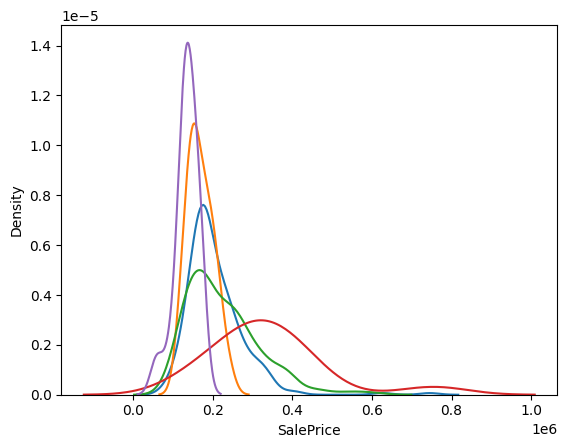

In [36]:
# for confirmation, we can also take help of graph by plotting before and after imputation

# before imputation

for category in X_train['FireplaceQu'].dropna().unique():
    sns.distplot(X_train[X_train['FireplaceQu']==category]['SalePrice'], hist=False, label=category)       
plt.show()      

C:\Users\munna\AppData\Local\Temp\ipykernel_6756\722808554.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[X_train['FireplaceQu_imputed'] == category]['SalePrice'],hist=False,label=category)
C:\Users\munna\AppData\Local\Temp\ipykernel_6756\722808554.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974

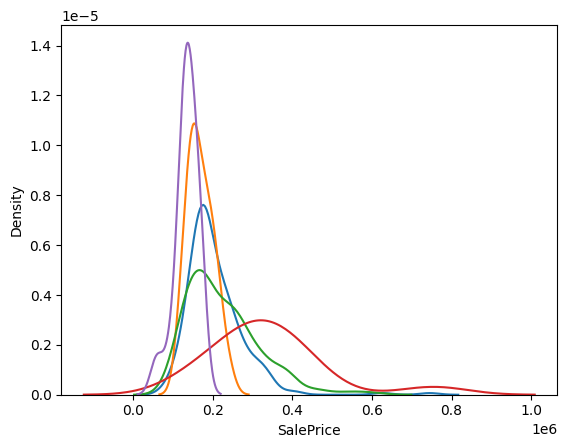

In [38]:
for category in X_train['FireplaceQu_imputed'].dropna().unique():
    sns.distplot(X_train[X_train['FireplaceQu_imputed'] == category]['SalePrice'],hist=False,label=category)
plt.show()